# Step 0: load necessary libraries

In [1]:
import xarray as xr
import datetime
import pandas as pd
import numpy as np
import xesmf as xe
import time
import gc
import matplotlib.pyplot as plt

/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
def regrid_data_2006(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2006-01-01", "2015-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2015-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg.loc["2015-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg_mask.loc["2015-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)


    
def regrid_data_2061(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2061-01-01", "2070-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2070-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg.loc["2070-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg_mask.loc["2070-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)
    
#########################################################################################################
def get_ds_2006(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge


def get_ds_2061(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge

def get_urban_df(ds):
    start_time = time.time()
    df_all = ds.to_dataframe()
    df = df_all[~np.isnan(df_all["tas"])]
    print("It takes elapsed_time", time.time()-start_time, "to convert to dataframe and get urban grid")

    df["PRECT"] = df["pr"]/1000.0
    df["PRSN"] = df["prsn"]/1000.0
    df["FSNS"] = df["rsds"] - df["rsus"]
    df["FLNS"] = df["rlus"] - df["rlds"]
    df = df.rename(columns={
        "uas":"UBOT",
        "vas":"VBOT",
        "huss":"QBOT",
        "tas":"TREFHT"
    })
    df_final = df[["QBOT","UBOT","VBOT",
                   "TREFHT",
                   "FLNS","FSNS",
                   "PRECT","PRSN"]]
    return df_final

# Step 1: define the grid and mask 

In [3]:
# define the model
mod = "CanESM2"
rcp = "_rcp85_r1i1p1_"

# define the grid mask 
CESM = xr.open_dataset("/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/lnd/proc/tseries/daily/TREFMXAV_U/b.e11.BRCP85C5CNBDRD.f09_g16.002.clm2.h1.TREFMXAV_U.20060101-20801231.nc")
grid = CESM["TREFMXAV_U"].loc["2006-01-02"]
mask = CESM["TREFMXAV_U"].loc["2006-01-02"].notnull().squeeze()
ds_out = xr.Dataset({'lat':(['lat'], grid["lat"].values),
                     'lon':(['lon'], grid["lon"].values)})

# define the load directory *****
CMIP_dir = "/glade/scratch/zhonghua/CMIP5/"
# define the save directory *****
CMIP_save_dir = "/glade/scratch/zhonghua/CMIP5-process/"

# Step 2: 2006-2015 

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/CanESM2/huss_day_CanESM2_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 7.612469673156738 to load the data
*********Start to merge*********
It takes elapsed_time 0.0689249038696289 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.14084792137145996 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.592634201049805 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6518218517303467 to mask the layer
*********Start to plot the layer*********


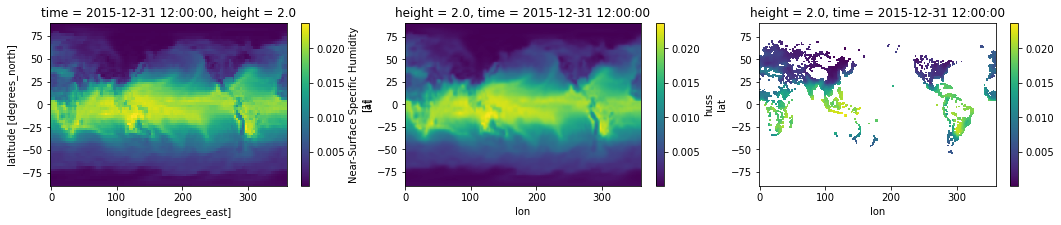

It takes elapsed_time 0.6598873138427734 to plot the layer
It takes elapsed_time 20.72763681411743 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/CanESM2/tas_day_CanESM2_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 5.253257513046265 to load the data
*********Start to merge*********
It takes elapsed_time 0.07165002822875977 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.02876758575439453 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.683584928512573 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6531882286071777 to mask the layer
*********Start to plot the layer*********


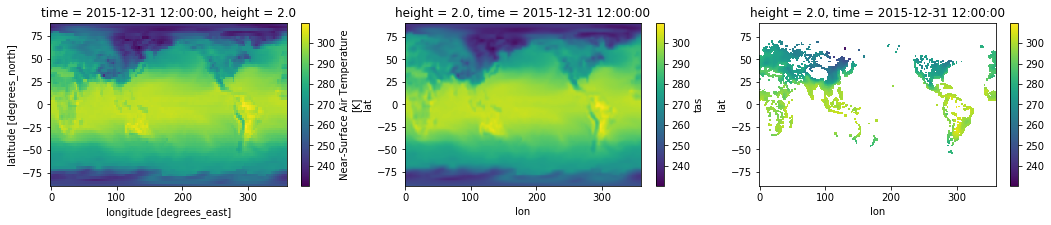

It takes elapsed_time 0.6797420978546143 to plot the layer
It takes elapsed_time 18.371484756469727 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/CanESM2/uas_day_CanESM2_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 4.700443983078003 to load the data
*********Start to merge*********
It takes elapsed_time 0.07582497596740723 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.029232501983642578 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.628090620040894 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6534276008605957 to mask the layer
*********Start to plot the layer*********


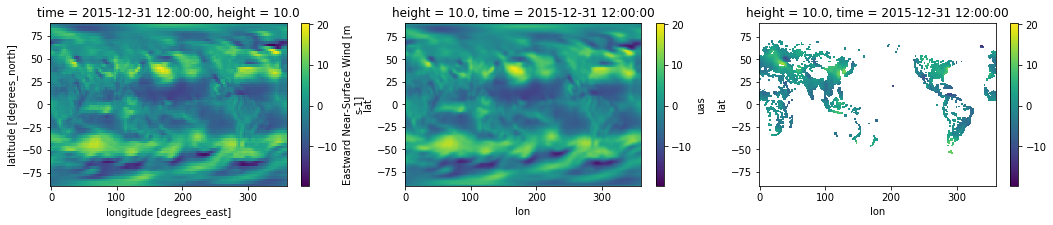

It takes elapsed_time 0.6636888980865479 to plot the layer
It takes elapsed_time 17.751649856567383 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/CanESM2/vas_day_CanESM2_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 5.076712608337402 to load the data
*********Start to merge*********
It takes elapsed_time 0.07271647453308105 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.02932453155517578 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.608453750610352 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6545774936676025 to mask the layer
*********Start to plot the layer*********


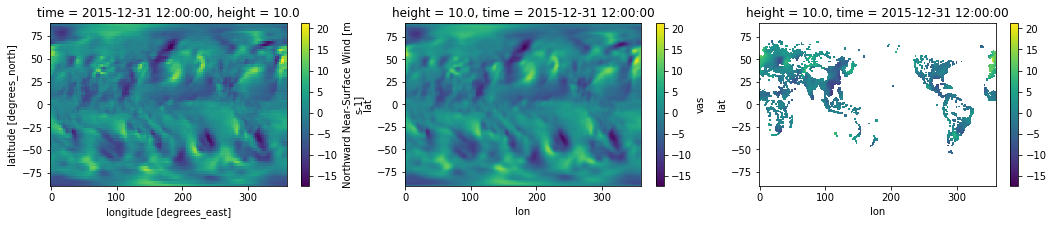

It takes elapsed_time 0.6976907253265381 to plot the layer
It takes elapsed_time 18.140745878219604 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/CanESM2/pr_day_CanESM2_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 4.864096641540527 to load the data
*********Start to merge*********
It takes elapsed_time 0.07263755798339844 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.029086589813232422 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.6105637550354 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6602232456207275 to mask the layer
*********Start to plot the layer*********


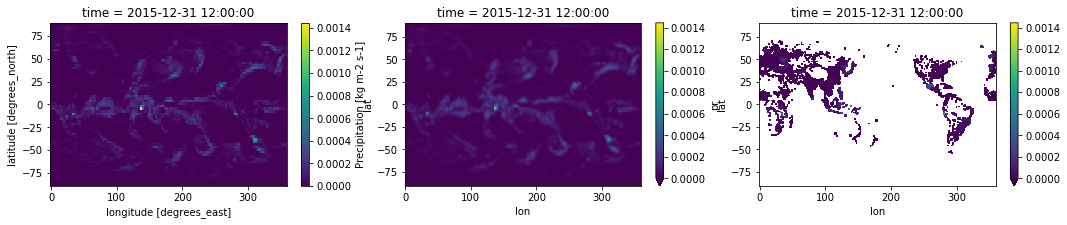

It takes elapsed_time 0.6684958934783936 to plot the layer
It takes elapsed_time 17.905964851379395 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/CanESM2/prsn_day_CanESM2_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 4.811968564987183 to load the data
*********Start to merge*********
It takes elapsed_time 0.0723428726196289 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.028799772262573242 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.597886800765991 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6529083251953125 to mask the layer
*********Start to plot the layer*********


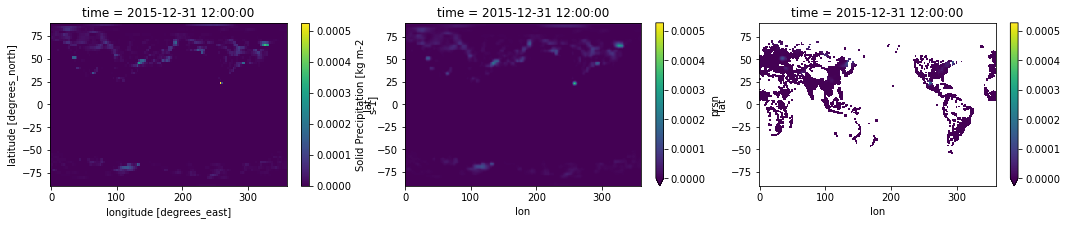

It takes elapsed_time 0.6378791332244873 to plot the layer
It takes elapsed_time 17.802897453308105 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/CanESM2/rlds_day_CanESM2_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 4.445329666137695 to load the data
*********Start to merge*********
It takes elapsed_time 0.07252144813537598 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.052774667739868164 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.597144603729248 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.657395601272583 to mask the layer
*********Start to plot the layer*********


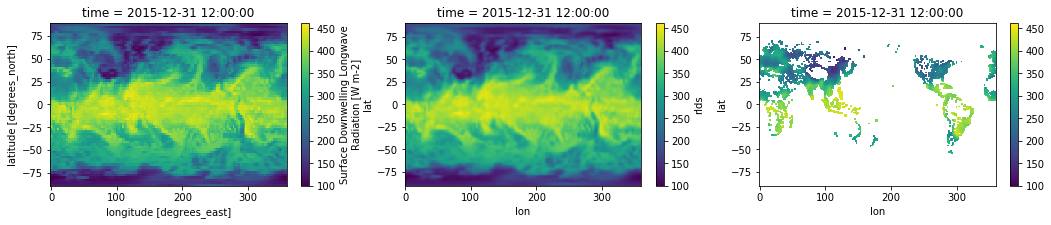

It takes elapsed_time 0.6904022693634033 to plot the layer
It takes elapsed_time 17.51632809638977 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/CanESM2/rlus_day_CanESM2_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 5.186061143875122 to load the data
*********Start to merge*********
It takes elapsed_time 0.07262206077575684 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.06092214584350586 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.602132797241211 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6534440517425537 to mask the layer
*********Start to plot the layer*********


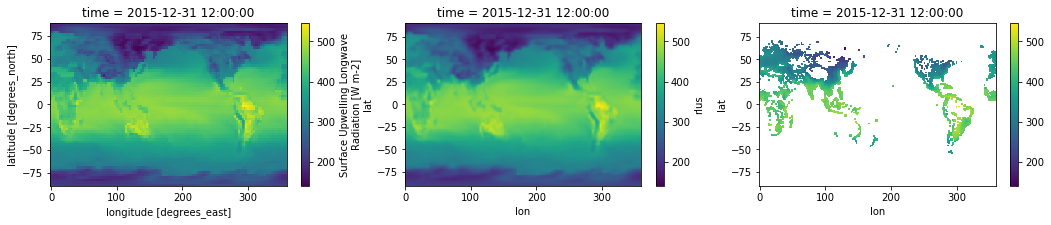

It takes elapsed_time 0.6467194557189941 to plot the layer
It takes elapsed_time 18.223015546798706 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/CanESM2/rsds_day_CanESM2_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 3.971282482147217 to load the data
*********Start to merge*********
It takes elapsed_time 0.0730752944946289 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.05811619758605957 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.634850025177002 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6560177803039551 to mask the layer
*********Start to plot the layer*********


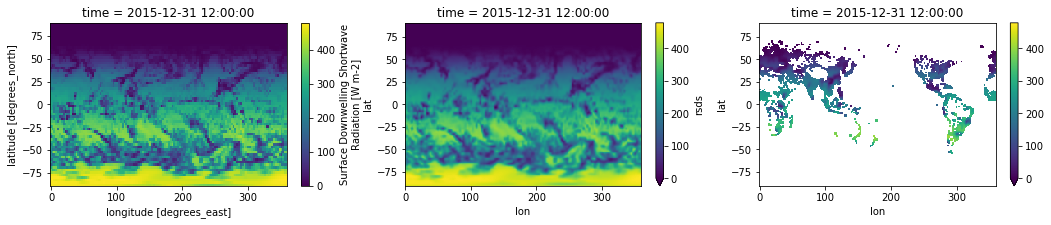

It takes elapsed_time 0.6592235565185547 to plot the layer
It takes elapsed_time 17.053444862365723 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/CanESM2/rsus_day_CanESM2_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 3.62042236328125 to load the data
*********Start to merge*********
It takes elapsed_time 0.07436680793762207 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.029062747955322266 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.663538455963135 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6537578105926514 to mask the layer
*********Start to plot the layer*********


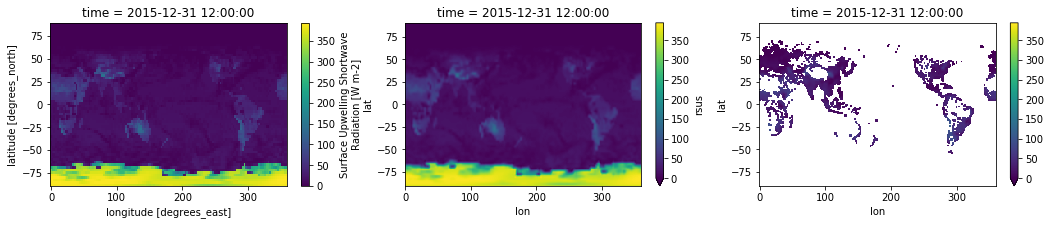

It takes elapsed_time 0.6710269451141357 to plot the layer
It takes elapsed_time 16.713104248046875 to deal with rsus in total
******End rsus******




In [4]:
ds = get_ds_2006(2006, 2101, 95)

In [5]:
df = get_urban_df(ds)

It takes elapsed_time 28.471659898757935 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [6]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2006.csv")
print(time.time()-start_time)

258.412171125412


# Step 3: 2061-2070 

In [7]:
del ds, df
gc.collect()

0

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/CanESM2/huss_day_CanESM2_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 2.8526813983917236 to load the data
*********Start to merge*********
It takes elapsed_time 0.0716395378112793 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.28887343406677246 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.842113018035889 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6818151473999023 to mask the layer
*********Start to plot the layer*********


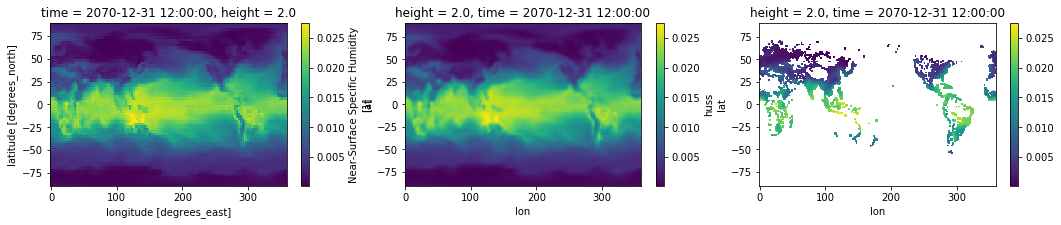

It takes elapsed_time 0.7181637287139893 to plot the layer
It takes elapsed_time 16.456247091293335 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/CanESM2/tas_day_CanESM2_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 4.468354225158691 to load the data
*********Start to merge*********
It takes elapsed_time 0.07585787773132324 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.030271291732788086 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.820505380630493 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6821520328521729 to mask the layer
*********Start to plot the layer*********


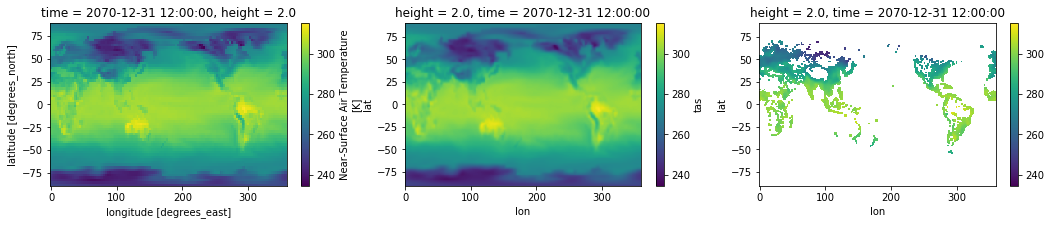

It takes elapsed_time 0.6698598861694336 to plot the layer
It takes elapsed_time 17.74822235107422 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/CanESM2/uas_day_CanESM2_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 4.694049596786499 to load the data
*********Start to merge*********
It takes elapsed_time 0.07659387588500977 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.029536008834838867 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.98897671699524 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6800408363342285 to mask the layer
*********Start to plot the layer*********


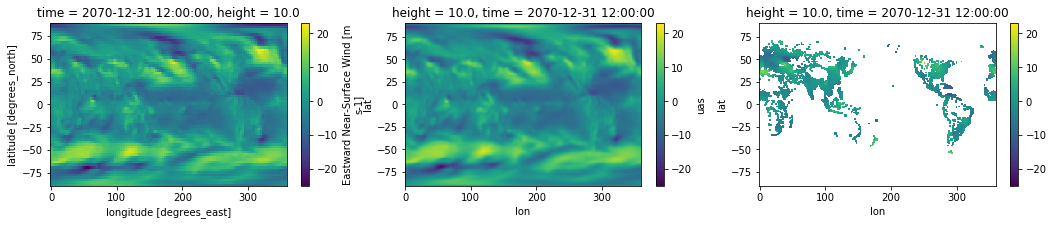

It takes elapsed_time 0.7241380214691162 to plot the layer
It takes elapsed_time 18.194409370422363 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/CanESM2/vas_day_CanESM2_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 3.7930846214294434 to load the data
*********Start to merge*********
It takes elapsed_time 0.07567262649536133 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.11775016784667969 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.692131042480469 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6662170886993408 to mask the layer
*********Start to plot the layer*********


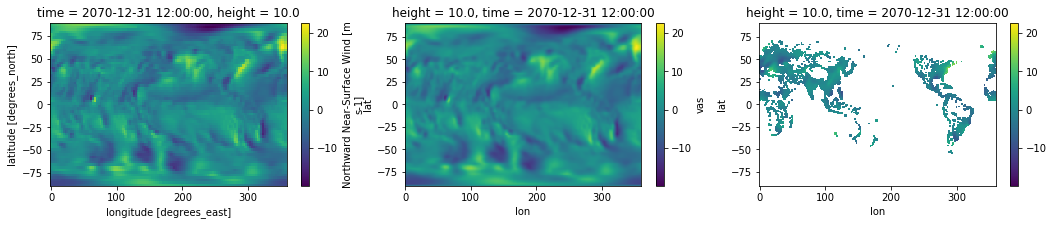

It takes elapsed_time 0.682042121887207 to plot the layer
It takes elapsed_time 17.028008222579956 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/CanESM2/pr_day_CanESM2_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 3.1737465858459473 to load the data
*********Start to merge*********
It takes elapsed_time 0.07728219032287598 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.1364302635192871 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.738129615783691 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6661980152130127 to mask the layer
*********Start to plot the layer*********


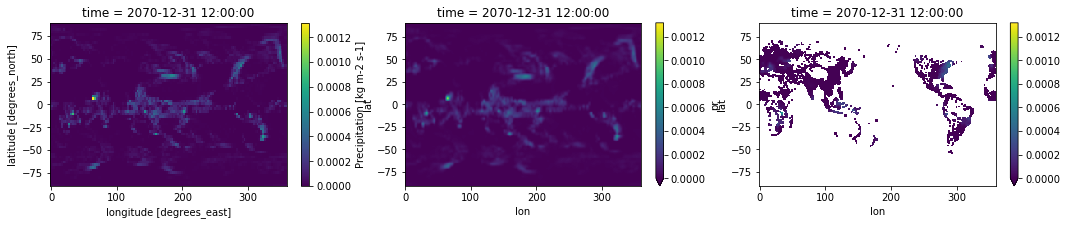

It takes elapsed_time 0.6716475486755371 to plot the layer
It takes elapsed_time 16.46422839164734 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/CanESM2/prsn_day_CanESM2_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 4.175021171569824 to load the data
*********Start to merge*********
It takes elapsed_time 0.0739278793334961 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.02985835075378418 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.638110876083374 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6649518013000488 to mask the layer
*********Start to plot the layer*********


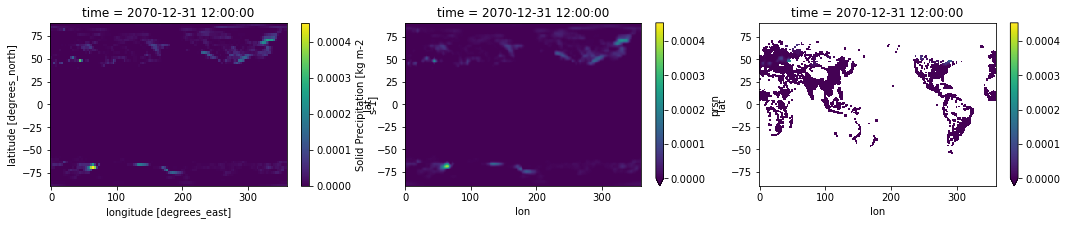

It takes elapsed_time 0.6443631649017334 to plot the layer
It takes elapsed_time 17.227157831192017 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/CanESM2/rlds_day_CanESM2_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 3.981313705444336 to load the data
*********Start to merge*********
It takes elapsed_time 0.07674217224121094 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.20755791664123535 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.656054735183716 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6652944087982178 to mask the layer
*********Start to plot the layer*********


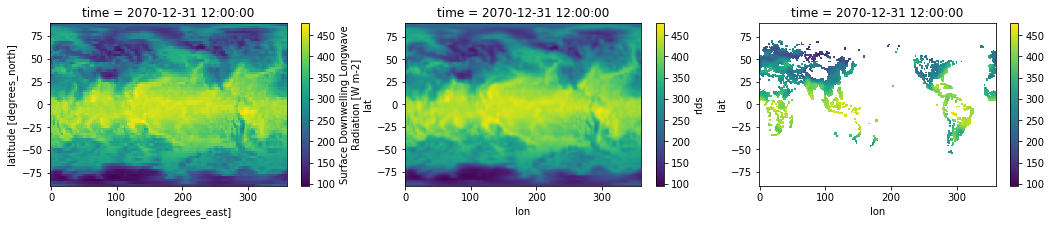

It takes elapsed_time 0.7134640216827393 to plot the layer
It takes elapsed_time 17.301515340805054 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/CanESM2/rlus_day_CanESM2_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 3.4645230770111084 to load the data
*********Start to merge*********
It takes elapsed_time 0.07651758193969727 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.02962183952331543 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.658403158187866 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6652460098266602 to mask the layer
*********Start to plot the layer*********


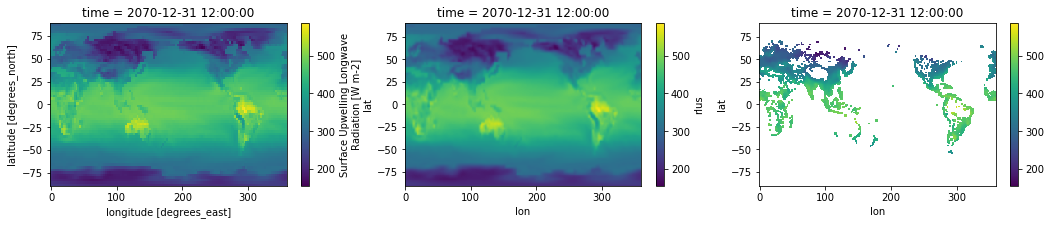

It takes elapsed_time 0.6594593524932861 to plot the layer
It takes elapsed_time 16.55473566055298 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/CanESM2/rsds_day_CanESM2_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 3.7400054931640625 to load the data
*********Start to merge*********
It takes elapsed_time 0.07436847686767578 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.08315134048461914 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.639179229736328 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6683235168457031 to mask the layer
*********Start to plot the layer*********


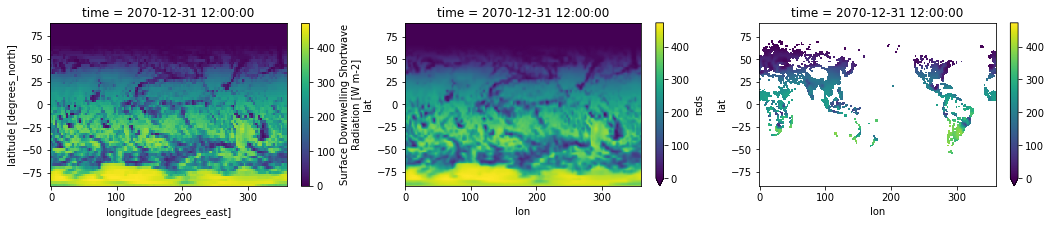

It takes elapsed_time 0.665693998336792 to plot the layer
It takes elapsed_time 16.87167501449585 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/CanESM2/rsus_day_CanESM2_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 3.754875659942627 to load the data
*********Start to merge*********
It takes elapsed_time 0.08155369758605957 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.15453839302062988 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.599554300308228 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6598029136657715 to mask the layer
*********Start to plot the layer*********


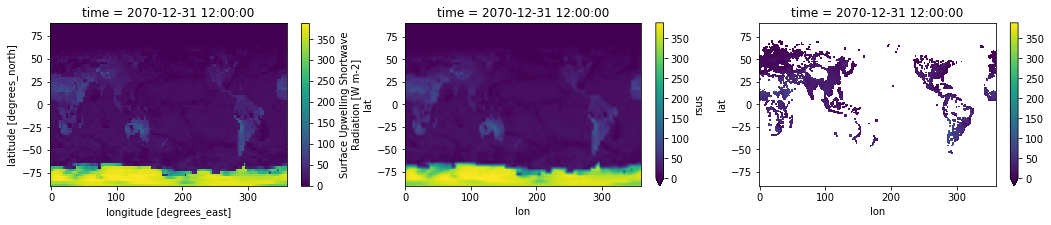

It takes elapsed_time 0.6864075660705566 to plot the layer
It takes elapsed_time 16.938672065734863 to deal with rsus in total
******End rsus******




In [8]:
ds = get_ds_2061(2006, 2101, 95)

In [9]:
df = get_urban_df(ds)

It takes elapsed_time 35.33348488807678 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [10]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2061.csv")
print(time.time()-start_time)

253.65334224700928


In [11]:
zz = pd.read_csv(CMIP_save_dir+mod+"/2061.csv")

In [12]:
zz

,lat,lon,time,QBOT,UBOT,VBOT,TREFHT,FLNS,FSNS,PRECT,PRSN
0,-54.188480,292.50,2061-01-01 12:00:00,0.006613,10.260078,-2.236593,282.494501,59.704163,273.460873,8.893196e-09,0.000000e+00
1,-54.188480,292.50,2061-01-02 12:00:00,0.006139,7.187735,-3.512253,281.740900,33.627747,229.784222,6.836310e-09,0.000000e+00
2,-54.188480,292.50,2061-01-03 12:00:00,0.006029,13.740761,-2.809768,282.001485,40.007258,260.333823,1.943463e-08,0.000000e+00
3,-54.188480,292.50,2061-01-04 12:00:00,0.006497,11.975849,-7.864020,282.894330,48.612749,223.494718,8.429664e-09,0.000000e+00
4,-54.188480,292.50,2061-01-05 12:00:00,0.006361,6.927857,-0.599703,282.779741,60.908009,318.202731,3.760459e-09,0.000000e+00
5,-54.188480,292.50,2061-01-06 12:00:00,0.005997,10.125519,-6.266556,282.420132,53.586778,176.499724,5.219066e-09,0.000000e+00
6,-54.188480,292.50,2061-01-07 12:00:00,0.007194,11.756882,-0.681992,283.992593,16.997951,109.854307,3.130348e-08,0.000000e+00
7,-54.188480,292.50,2061-01-08 12:00:00,0.006229,11.055217,-2.196121,282.480570,26.282356,158.423701,4.420576e-08,0.000000e+00
8,-54.188480,292.50,2061-01-09 12:00:00,0.006558,16.972847,-2.214384,282.585757,25.685357,152.459317,3.682425e-08,0.000000e+00
9,-54.188480,292.50,2061-01-10 12:00:00,0.005357,10.726446,6.458422,280.728641,76.049614,290.575587,2.615546e-08,0.000000e+00
